In [1]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('cmu_paper')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Knapsack-v0

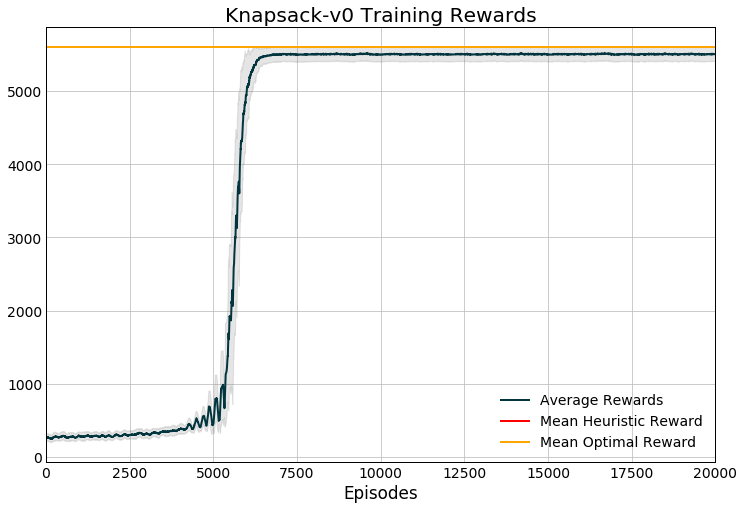

In [5]:
data_path = '/home/christian/ray_results/A3C/A3C_Knapsack-v0_e3533e53_5_entropy_coeff=0.0001,lr=1e-06_2020-05-05_12-04-157l2q7opu'

# Get episode totals
ep_stats = ['hist_stats/episode_reward']
train_data = pd.read_csv(data_path + '/progress.csv')
for i in ep_stats:
    vals = None
    ep_vals = train_data[i].values
    for j in ep_vals:
        ep_vals = np.array(re.findall(r"[-+]?\d*\.\d+|\d+", j)).astype(float)
        if vals is None:
            vals = ep_vals.copy()
        else:
            vals = np.hstack([vals, ep_vals.copy()])

vals = np.where(vals>5602, 5602, vals)
window = 100
reward_var = np.array([np.std(vals[i-window:i+1]) 
                       if i>window else np.std(vals[:i+1]) 
                       for i, j in enumerate(vals)])
med_reward = np.array([np.median(vals[i-window:i+1]) 
                       if i>window else np.median(vals[:i+1]) 
                       for i, j in enumerate(vals)])
ep_max = np.array([np.max(vals[i-window:i+1]) 
                       if i>window else np.max(vals[:i+1]) 
                       for i, j in enumerate(vals)])


ep_min = np.array([np.min(vals[i-window:i+1]) 
                       if i>window else np.min(vals[:i+1]) 
                       for i, j in enumerate(vals)])
mean_vals = np.array([np.mean(vals[i-window:i+1]) 
                       if i>window else np.mean(vals[:i+1]) 
                       for i, j in enumerate(vals)])

# ep_max = np.where(ep_max>5602, 5602, ep_max)
# mean_vals = np.where(mean_vals>5602, 5602, mean_vals)
if np.max(mean_vals) > 0:
    fill_max = np.where(mean_vals + reward_var<=ep_max, mean_vals+reward_var, ep_max)
    fill_min = np.where(mean_vals - reward_var>0, mean_vals-reward_var, 0)
else:
    fill_max = np.where(mean_vals + reward_var<=0, mean_vals+reward_var, ep_max)
    fill_min = np.where(mean_vals - reward_var>ep_min, mean_vals-reward_var, ep_min)

    
x_min = 0
x_max = 20000
opt_mean = 5602
opt_var = 0
heur_mean = 5602
heur_var = 0

plt.figure(figsize=(12,8))
plt.plot(mean_vals, label='Average Rewards')
plt.fill_between(np.arange(mean_vals.shape[0]), fill_min, fill_max,
                 color='gray', alpha=0.2) #, label='RL Variance')

plt.axhline(xmin=0, xmax=x_max, y=heur_mean, color='r', label='Mean Heuristic Reward')
plt.fill_between(np.arange(x_min, mean_vals.shape[0]), heur_mean-heur_var, 
                 heur_mean+heur_var, color='r', alpha=0.2)#, label='Heuristic Variance')

plt.axhline(xmin=0, xmax=x_max, y=opt_mean, color='orange', label='Mean Optimal Reward')
# plt.fill_between(np.arange(x_min, mean_vals.shape[0]), opt_mean-opt_var, 
#                  opt_mean+opt_var, color='orange', alpha=0.2, label='Optimization Variance')

plt.title('Knapsack-v0 Training Rewards')
plt.legend()
plt.xlabel('Episodes')
plt.xlim([x_min, x_max])
plt.show()

# Knapsack-v1

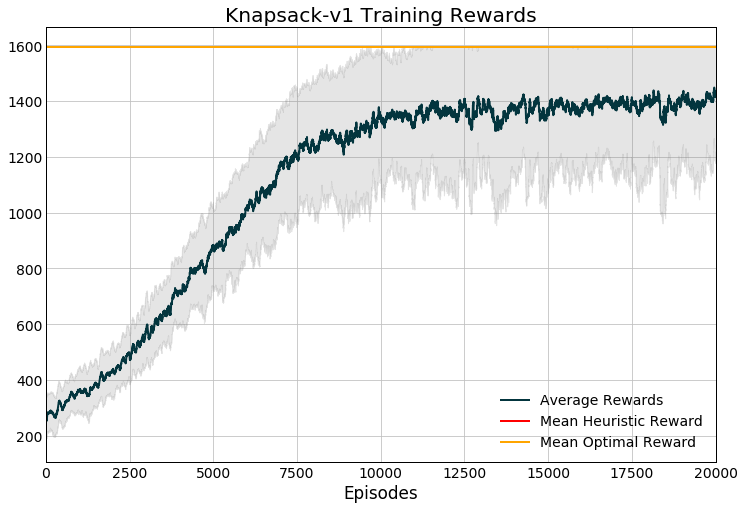

In [6]:
data_path = '/home/christian/ray_results/PPO/PPO_Knapsack-v1_3_entropy_coeff=0.0001,lr=1e-05_2020-05-17_22-55-58o_y9j2wi'

opt_mean = 1593
opt_var = 0
heur_mean = 1592
heur_var = 0

# Get episode totals
ep_stats = ['hist_stats/episode_reward']
train_data = pd.read_csv(data_path + '/progress.csv')
for i in ep_stats:
    vals = None
    ep_vals = train_data[i].values
    for j in ep_vals:
        ep_vals = np.array(re.findall(r"[-+]?\d*\.\d+|\d+", j)).astype(float)
        if vals is None:
            vals = ep_vals.copy()
        else:
            vals = np.hstack([vals, ep_vals.copy()])

vals = np.where(vals>opt_mean, opt_mean, vals)
window = 100
reward_var = np.array([np.std(vals[i-window:i+1]) 
                       if i>window else np.std(vals[:i+1]) 
                       for i, j in enumerate(vals)])
med_reward = np.array([np.median(vals[i-window:i+1]) 
                       if i>window else np.median(vals[:i+1]) 
                       for i, j in enumerate(vals)])
ep_max = np.array([np.max(vals[i-window:i+1]) 
                       if i>window else np.max(vals[:i+1]) 
                       for i, j in enumerate(vals)])


ep_min = np.array([np.min(vals[i-window:i+1]) 
                       if i>window else np.min(vals[:i+1]) 
                       for i, j in enumerate(vals)])
mean_vals = np.array([np.mean(vals[i-window:i+1]) 
                       if i>window else np.mean(vals[:i+1]) 
                       for i, j in enumerate(vals)])

if np.max(mean_vals) > 0:
    fill_max = np.where(mean_vals + reward_var<=ep_max, mean_vals+reward_var, ep_max)
    fill_min = np.where(mean_vals - reward_var>0, mean_vals-reward_var, 0)
else:
    fill_max = np.where(mean_vals + reward_var<=0, mean_vals+reward_var, ep_max)
    fill_min = np.where(mean_vals - reward_var>ep_min, mean_vals-reward_var, ep_min)

    
x_min = 0
x_max = 20000


plt.figure(figsize=(12,8))
plt.plot(mean_vals, label='Average Rewards')
plt.fill_between(np.arange(mean_vals.shape[0]), fill_min, fill_max,
                 color='gray', alpha=0.2) #, label='RL Variance')

plt.axhline(xmin=0, xmax=x_max, y=heur_mean, color='r', label='Mean Heuristic Reward')
# plt.fill_between(np.arange(x_min, mean_vals.shape[0]), heur_mean-heur_var, 
#                  heur_mean+heur_var, color='r', alpha=0.2, label='Heuristic Variance')

plt.axhline(xmin=0, xmax=x_max, y=opt_mean, color='orange', label='Mean Optimal Reward')
# plt.fill_between(np.arange(x_min, mean_vals.shape[0]), opt_mean-opt_var, 
#                  opt_mean+opt_var, color='orange', alpha=0.2, label='Optimization Variance')

plt.title('Knapsack-v1 Training Rewards')
plt.legend()
plt.xlabel('Episodes')
plt.xlim([x_min, x_max])
plt.show()